In [1]:
from datascience import *
import numpy as np
from path_data_variable import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
original = Table.read_table(path_data + 'family_heights.csv')

heights = Table().with_columns(
    'MidParent', original.column('midparentHeight'),
    'Child', original.column('childHeight')
    )

In [3]:
def predict_child(mpht):
    """Return a prediction of the height of a child 
    whose parents have a midparent height of mpht.
    
    The prediction is the average height of the children 
    whose midparent height is in the range mpht plus or minus 0.5 inches.
    """
    
    close_points = heights.where('MidParent', are.between(mpht-0.5, mpht + 0.5))
    return close_points.column('Child').mean()   

In [4]:
heights_with_predictions = heights.with_column(
    'Prediction', heights.apply(predict_child, 'MidParent')
    )

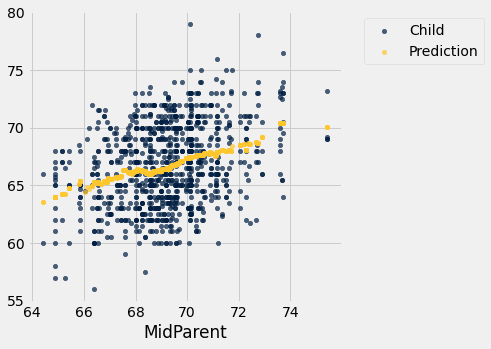

In [5]:
heights_with_predictions.scatter('MidParent')

In [6]:
def standard_units(xyz):
    "Convert any array of numbers to standard units."
    return (xyz - np.mean(xyz))/np.std(xyz)  

In [7]:
heights_SU = Table().with_columns(
    'MidParent SU', standard_units(heights.column('MidParent')),
    'Child SU', standard_units(heights.column('Child'))
)
heights_SU

MidParent SU | Child SU
3.45465      | 1.80416
3.45465      | 0.686005
3.45465      | 0.630097
3.45465      | 0.630097
2.47209      | 1.88802
2.47209      | 1.60848
2.47209      | -0.348285
2.47209      | -0.348285
1.58389      | 1.18917
1.58389      | 0.350559
... (924 rows omitted)

In [8]:
sd_midparent = np.std(heights.column(0))
sd_midparent

1.8014050969207571

In [9]:
0.5/sd_midparent

0.277561110965367

In [10]:
def predict_child_su(mpht_su):
    """Return a prediction of the height (in standard units) of a child 
    whose parents have a midparent height of mpht_su in standard units.
    """
    close = 0.5/sd_midparent
    close_points = heights_SU.where('MidParent SU', are.between(mpht_su-close, mpht_su + close))
    return close_points.column('Child SU').mean()   

In [11]:
heights_with_su_predictions = heights_SU.with_column(
    'Prediction SU', heights_SU.apply(predict_child_su, 'MidParent SU')
    )

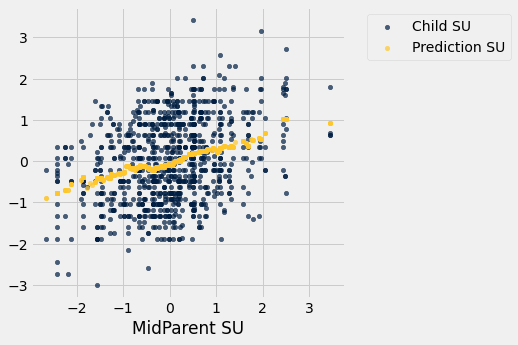

In [12]:
heights_with_su_predictions.scatter('MidParent SU')

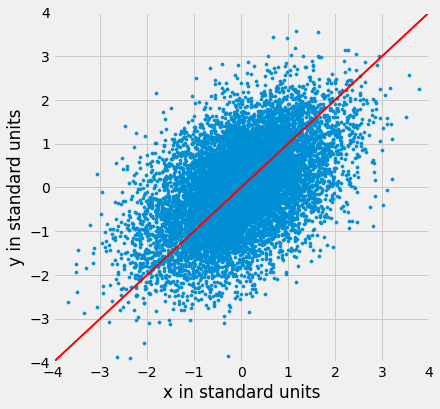

In [13]:
r = 0.5
x_demo = np.random.normal(0, 1, 10000)
z_demo = np.random.normal(0, 1, 10000)
y_demo = r*x_demo + np.sqrt(1 - r**2)*z_demo
plots.figure(figsize=(6,6))
plots.xlim(-4, 4)
plots.ylim(-4, 4)
plots.scatter(x_demo, y_demo, s=10)
#plots.plot([-4, 4], [-4*0.6,4*0.6], color='g', lw=2)
plots.plot([-4,4],[-4,4], color='r', lw=2)
#plots.plot([1.5,1.5], [-4,4], color='k', lw=2)
plots.xlabel('x in standard units')
plots.ylabel('y in standard units');

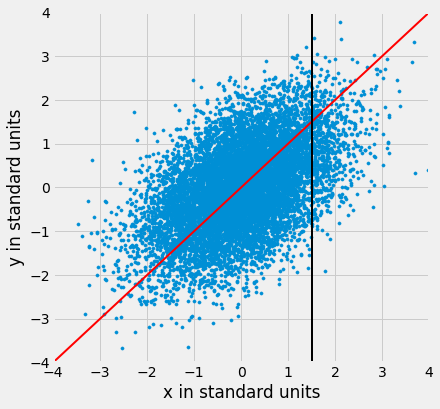

In [14]:
r = 0.5
x_demo = np.random.normal(0, 1, 10000)
z_demo = np.random.normal(0, 1, 10000)
y_demo = r*x_demo + np.sqrt(1 - r**2)*z_demo
plots.figure(figsize=(6,6))
plots.xlim(-4, 4)
plots.ylim(-4, 4)
plots.scatter(x_demo, y_demo, s=10)
#plots.plot([-4, 4], [-4*0.6,4*0.6], color='g', lw=2)
plots.plot([-4,4],[-4,4], color='r', lw=2)
plots.plot([1.5,1.5], [-4,4], color='k', lw=2)
plots.xlabel('x in standard units')
plots.ylabel('y in standard units');

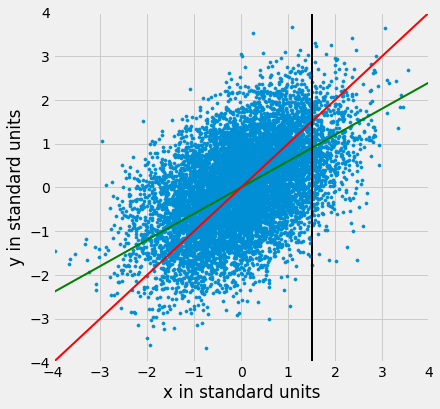

In [15]:
r = 0.5
x_demo = np.random.normal(0, 1, 10000)
z_demo = np.random.normal(0, 1, 10000)
y_demo = r*x_demo + np.sqrt(1 - r**2)*z_demo
plots.figure(figsize=(6,6))
plots.xlim(-4, 4)
plots.ylim(-4, 4)
plots.scatter(x_demo, y_demo, s=10)
plots.plot([-4, 4], [-4*0.6,4*0.6], color='g', lw=2)
plots.plot([-4,4],[-4,4], color='r', lw=2)
plots.plot([1.5,1.5], [-4,4], color='k', lw=2)
plots.xlabel('x in standard units')
plots.ylabel('y in standard units');

In [16]:

def regression_line(r):
    x = np.random.normal(0, 1, 10000)
    z = np.random.normal(0, 1, 10000)
    y = r*x + (np.sqrt(1-r**2))*z
    plots.figure(figsize=(6, 6))
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)
    plots.scatter(x, y)
    plots.plot([-4, 4], [-4*r,4*r], color='g', lw=2)
    if r >= 0:
        plots.plot([-4,4],[-4,4], lw=2, color='r')
    else:
        plots.plot([-4,4], [4,-4], lw=2, color='r')

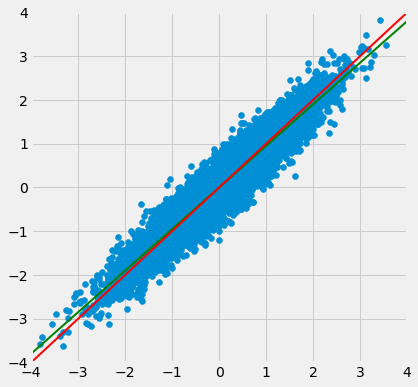

In [17]:
regression_line(0.95)

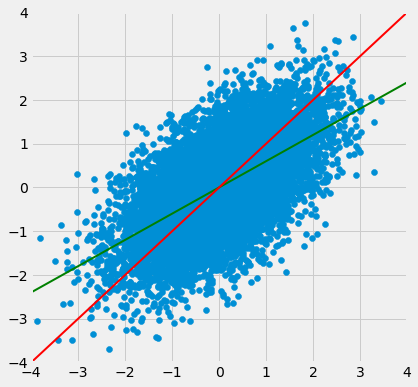

In [18]:
regression_line(0.6)

In [19]:
def correlation(t, label_x, label_y):
    return np.mean(standard_units(t.column(label_x))*standard_units(t.column(label_y)))

def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t.column(label_y))/np.std(t.column(label_x))

def intercept(t, label_x, label_y):
    return np.mean(t.column(label_y)) - slope(t, label_x, label_y)*np.mean(t.column(label_x))

In [20]:
family_r = correlation(heights, 'MidParent', 'Child')
family_r

0.32094989606395924

In [21]:
family_slope = slope(heights, 'MidParent', 'Child')
family_intercept = intercept(heights, 'MidParent', 'Child')
family_slope, family_intercept

(0.637360896969479, 22.63624054958975)

In [22]:
family_slope * 70.48 + family_intercept

67.55743656799862

In [23]:
heights_with_predictions.where('MidParent', are.equal_to(70.48)).show(3)

In [25]:
heights_with_predictions = heights_with_predictions.with_column(
    'Regression Prediction', family_slope * heights.column('MidParent') + family_intercept
)
heights_with_predictions

MidParent | Child | Prediction | Regression Prediction
75.43     | 73.2  | 70.1       | 70.7124
75.43     | 69.2  | 70.1       | 70.7124
75.43     | 69    | 70.1       | 70.7124
75.43     | 69    | 70.1       | 70.7124
73.66     | 73.5  | 70.4158    | 69.5842
73.66     | 72.5  | 70.4158    | 69.5842
73.66     | 65.5  | 70.4158    | 69.5842
73.66     | 65.5  | 70.4158    | 69.5842
72.06     | 71    | 68.5025    | 68.5645
72.06     | 68    | 68.5025    | 68.5645
... (924 rows omitted)

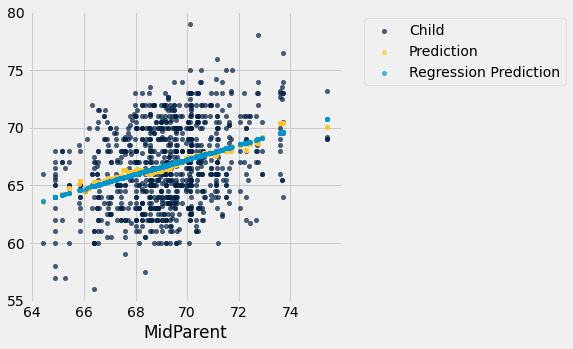

In [26]:
heights_with_predictions.scatter('MidParent')

In [27]:
def fit(table, x, y):
    """Return the height of the regression line at each x value."""
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

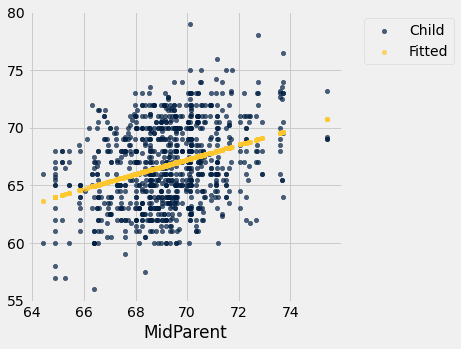

In [28]:
heights.with_column('Fitted', fit(heights, 'MidParent', 'Child')).scatter('MidParent')

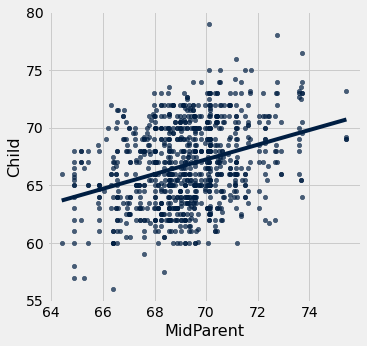

In [29]:
heights.scatter('MidParent', fit_line=True)

In [30]:
baby = Table.read_table(path_data + 'baby.csv')

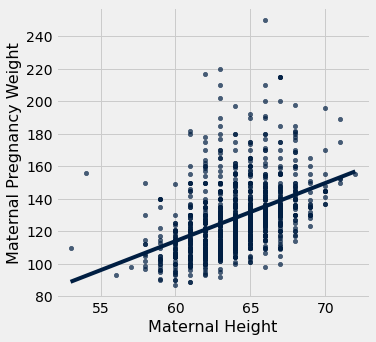

In [31]:
baby.scatter('Maternal Height', 'Maternal Pregnancy Weight', fit_line=True)

In [32]:
slope(baby, 'Maternal Height', 'Maternal Pregnancy Weight')

3.572846259275056